In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def generate_dataset():
  dataset = make_classification(n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30, 
                                scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1, 
                                class_sep=1, random_state=1)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['GRE_Score', 'Admission']
  return df

In [5]:
data = generate_dataset()

In [7]:
data.head()

,GRE_Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0


<Axes: xlabel='GRE_Score', ylabel='Admission'>

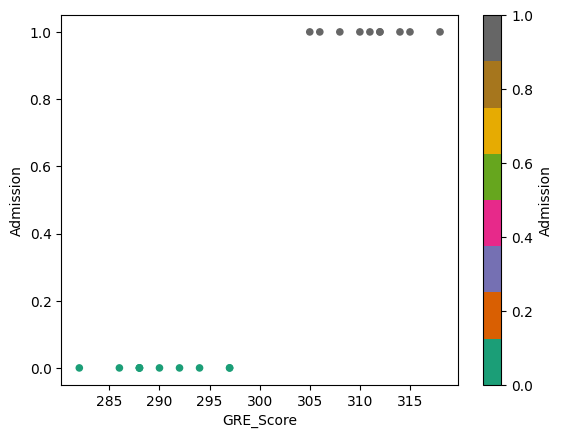

In [13]:
data.plot(kind="scatter" , x="GRE_Score",y="Admission",c="Admission",cmap="Dark2")

# logistic regression

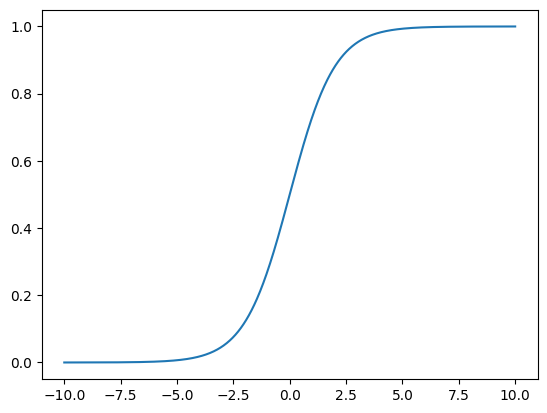

In [14]:
x = np.linspace(-10,10,1000)

def sigmoid(z):
    return 1/(1+np.exp(-z))

plt.plot(x,sigmoid(x))

In [23]:

x = data[["GRE_Score"]].to_numpy()

In [24]:
y = data[["Admission"]].to_numpy()

In [25]:


from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y)

LinearRegression()

In [26]:
y_hat = linear_reg.predict(x)

In [28]:
prob_y = sigmoid(y_hat)

In [29]:
prob_y

array([[0.70777288],
       [0.58658489],
       [0.77094494],
       [0.5154789 ],
       [0.49491761],
       [0.55637594],
       [0.7244927 ],
       [0.4336125 ],
       [0.74842993],
       [0.71620712],
       [0.4743735 ],
       [0.7244927 ],
       [0.49491761],
       [0.7406065 ],
       [0.69047187],
       [0.53598793],
       [0.58658489],
       [0.67262037],
       [0.66349935],
       [0.49491761]])

In [30]:
result = prob_y >0.6


In [32]:

result.astype(int).flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [33]:
y.astype(int).flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])